# Football Match Statistics (EPL 2020–2024)
### Overview
This project analyzes recent Premier League seasons to answer two focused questions:    
	1.	How many goals are scored per match, overall and by home versus away teams?       
    2.	How does possession advantage relate to the probability of winning?
The analysis is implemented in a single Jupyter notebook with reproducible steps, clean outputs, and three high‑impact figures suitable for presentation.
### Objectives
	•	Calculate and visualize goals per match by season and by home/away.
	•	Define the relationship between possession advantage and win rate.
	•	Produce publication‑ready charts and a brief, coach‑friendly summary.
### Data
	•	Source: Kaggle Premier League Matches, seasons 2020–2024.
	•	Minimum required fields:
	•	date, season, home_team, away_team
	•	home_goals, away_goals
	•	home_possession, away_possession

In [19]:
#importing all required libraries.
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#importing the dataset
df = pd.read_csv("matches.csv")
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [21]:
df.isna().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [22]:
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [23]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [24]:
#renaming rows to a more readable format
rename_map = {
    'date': 'match_date',
    'time': 'kickoff_time',
    'comp': 'competition',
    'round': 'round',
    'day': 'weekday',
    'venue': 'venue',
    'result': 'result',
    'gf': 'home_goals',
    'ga': 'away_goals',
    'opponent': 'away_team',
    'xg': 'home_xg',
    'xga': 'away_xg',
    'poss': 'home_possession_pct',
    'attendance': 'attendance',
    'captain': 'home_captain',
    'formation': 'home_formation',
    'referee': 'referee',
    'match report': 'match_report_url',
    'notes': 'notes',
    'sh': 'home_shots_total',
    'sot': 'home_shots_on_target',
    'dist': 'home_avg_shot_distance',
    'fk': 'home_free_kicks',
    'pk': 'home_penalty_goals',
    'pkatt': 'home_penalties_attempted',
    'season': 'season',
    'team': 'home_team'
}

df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})
df.columns

Index(['Unnamed: 0', 'match_date', 'kickoff_time', 'competition', 'round',
       'weekday', 'venue', 'result', 'home_goals', 'away_goals', 'away_team',
       'home_xg', 'away_xg', 'home_possession_pct', 'attendance',
       'home_captain', 'home_formation', 'referee', 'match_report_url',
       'notes', 'home_shots_total', 'home_shots_on_target',
       'home_avg_shot_distance', 'home_free_kicks', 'home_penalty_goals',
       'home_penalties_attempted', 'season', 'home_team'],
      dtype='object')

In [25]:
df

,Unnamed: 0,match_date,kickoff_time,competition,round,weekday,venue,result,home_goals,away_goals,...,match_report_url,notes,home_shots_total,home_shots_on_target,home_avg_shot_distance,home_free_kicks,home_penalty_goals,home_penalties_attempted,season,home_team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [26]:
#since the column unnamed:0 and notes are not of much use so we will remove them
df = df.drop(columns = ["Unnamed: 0" , "notes"])
df.head()

,match_date,kickoff_time,competition,round,weekday,venue,result,home_goals,away_goals,away_team,...,referee,match_report_url,home_shots_total,home_shots_on_target,home_avg_shot_distance,home_free_kicks,home_penalty_goals,home_penalties_attempted,season,home_team
0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City


In [27]:
#filling missing attendance values with median values using simple imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
df["attendance"] = imp.fit_transform(df[["attendance"]]).ravel().astype(float)
#checking if it worked
print("Remaining NaN in attendance:", df["attendance"].isna().sum())


Remaining NaN in attendance: 0


In [28]:
df["total_goals"] = df["home_goals"] + df["away_goals"]
df["goal_difference"] = df["home_goals"] - df["away_goals"]
df["possession_adv"] = df["home_possession_pct"] - 50
df["abs_poss_diff"] = df["possession_adv"].abs()

In [29]:
gpm_season = df.groupby("season")["total_goals"].mean().reset_index(name="goals_per_match")
gpm_season

,season,goals_per_match
0,2020,2.721053
1,2021,2.694737
2,2022,2.818421
3,2023,2.898785
4,2024,2.986842


In [30]:
home_away_gpm = pd.DataFrame({
    "side":["Home","Away"],
    "goals_per_match":[df["home_goals"].mean(), df["away_goals"].mean()]
})
home_away_gpm

,side,goals_per_match
0,Home,1.447995
1,Away,1.405388


In [31]:
df.head()

,match_date,kickoff_time,competition,round,weekday,venue,result,home_goals,away_goals,away_team,...,home_avg_shot_distance,home_free_kicks,home_penalty_goals,home_penalties_attempted,season,home_team,total_goals,goal_difference,possession_adv,abs_poss_diff
0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,...,21.1,2,1,1,2024,Manchester City,4,2,15,15
1,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,...,19.8,1,0,0,2024,Manchester City,7,-3,22,22
2,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,...,18.2,1,0,0,2024,Manchester City,2,0,-1,1
3,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,...,17.7,0,0,0,2024,Manchester City,1,1,8,8
4,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,...,20.9,1,0,0,2024,Manchester City,2,0,19,19


In [32]:
#finding possession vs win rate
bins = [0,5,10,15,20,25,30,40,50]
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins)-1)]
df["possdiff_bin"] = pd.cut(df["abs_poss_diff"], bins=bins, labels=labels, right=False, include_lowest=True)

win_more_poss = np.where(
    (df["possession_adv"]>0) & (df["home_goals"]>df["away_goals"]), 1,
    np.where((df["possession_adv"]<0) & (df["home_goals"]<df["away_goals"]), 1, 0)
)
mask = df["possession_adv"] != 0
curve = (df[mask].assign(win_more_poss=win_more_poss[mask])
         .groupby("possdiff_bin", observed=True)["win_more_poss"]
         .agg(win_rate="mean", n="count").reset_index())


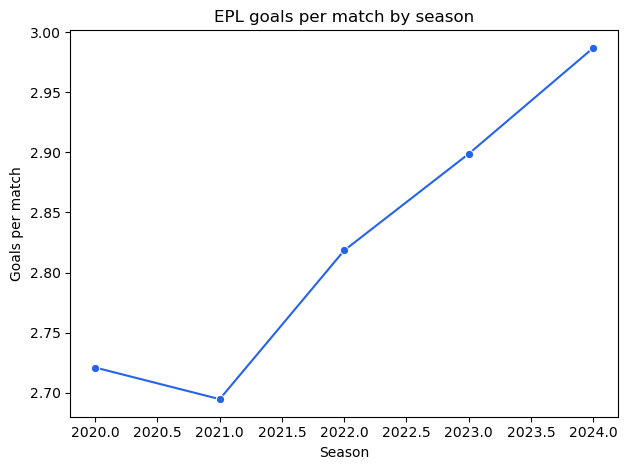

In [33]:
#Goals per match trend
ax = sns.lineplot(gpm_season, x="season", y="goals_per_match", marker="o", color="#2563eb")
ax.set(title="EPL goals per match by season", xlabel="Season", ylabel="Goals per match")
plt.tight_layout()
plt.show()

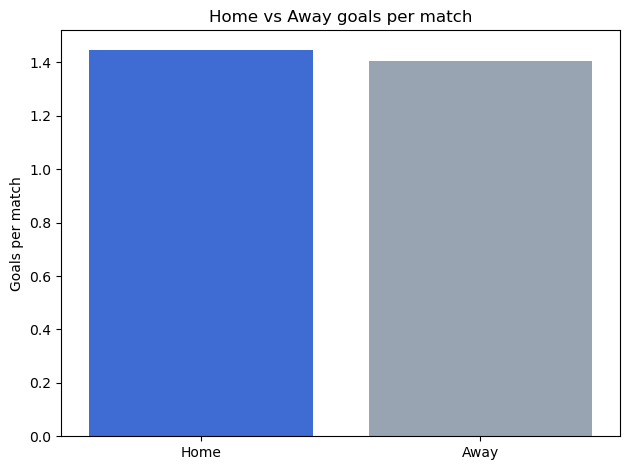

In [34]:
#Home vs away goals per match
ax = sns.barplot(
    data=home_away_gpm,
    x="side", y="goals_per_match",
    hue="side", palette=["#2563eb","#94a3b8"],
    legend=False
)
ax.set(title="Home vs Away goals per match", xlabel="", ylabel="Goals per match")
plt.tight_layout()
plt.show()

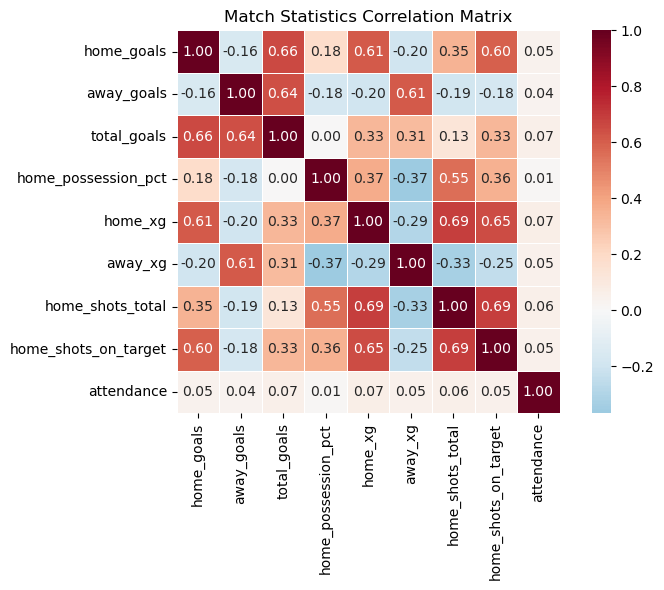

In [38]:
# Select numeric columns for correlation
numeric_cols = ['home_goals', 'away_goals', 'total_goals', 'home_possession_pct', 
                'home_xg', 'away_xg', 'home_shots_total', 'home_shots_on_target', 'attendance']
corr_data = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Match Statistics Correlation Matrix')
plt.tight_layout()
plt.show()


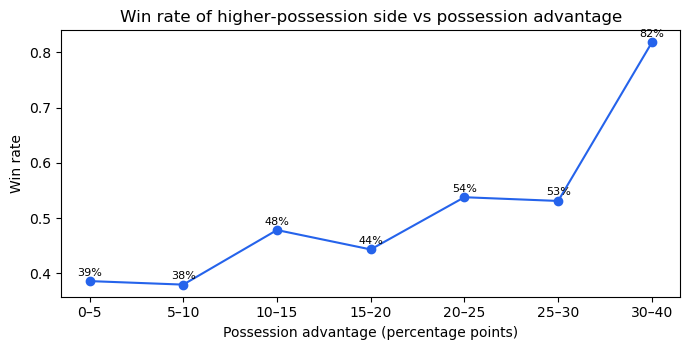

In [35]:
#Possession advantage vs win rate
ax = plt.figure(figsize=(7,3.6)).gca()
ax.plot(curve["possdiff_bin"].astype(str), curve["win_rate"], marker="o", color="#2563eb")
ax.set(title="Win rate of higher‑possession side vs possession advantage",
       xlabel="Possession advantage (percentage points)", ylabel="Win rate")
for x,y in zip(curve["possdiff_bin"].astype(str), curve["win_rate"]): ax.text(x, y+0.01, f"{y*100:.0f}%", ha="center", fontsize=8)
plt.tight_layout()
plt.show()

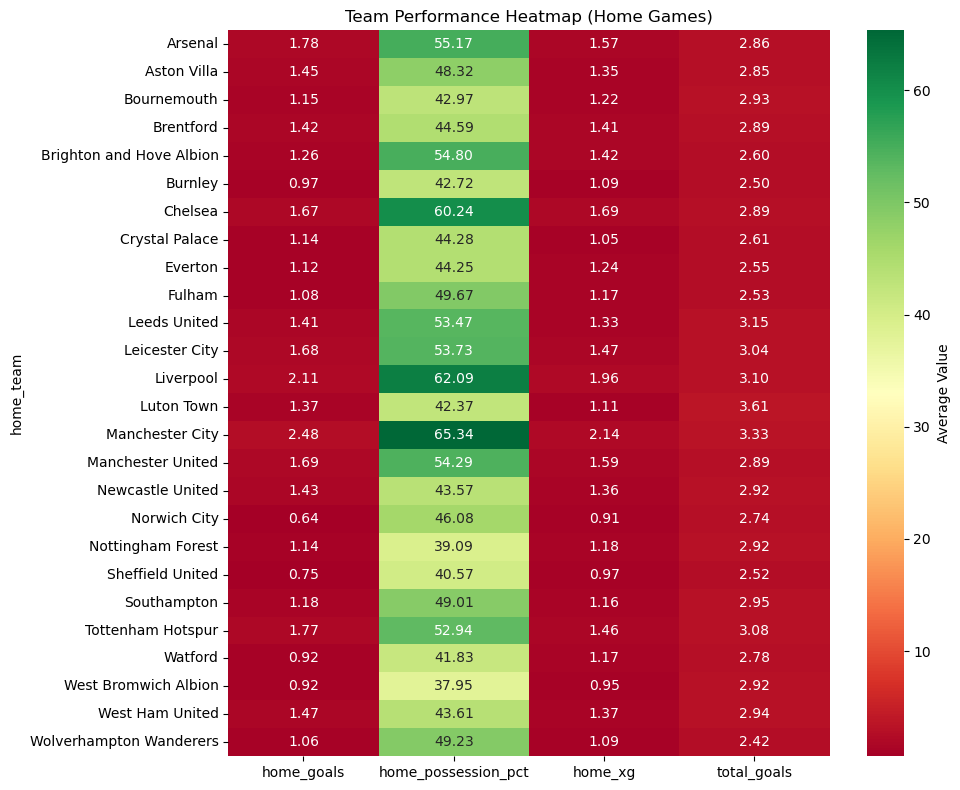

In [39]:
# Create team-level aggregations
team_stats = df.groupby('home_team').agg({
    'home_goals': 'mean',
    'home_possession_pct': 'mean',
    'home_xg': 'mean',
    'total_goals': 'mean'
}).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(team_stats, annot=True, cmap='RdYlGn', 
            fmt='.2f', cbar_kws={'label': 'Average Value'})
plt.title('Team Performance Heatmap (Home Games)')
plt.tight_layout()
plt.show()


In [36]:
#exporting our analysis result to access it locally
gpm_season.to_csv("gpm_by_season.csv", index=False)
home_away_gpm.to_csv("home_away_gpm.csv", index=False)
curve.to_csv("possession_win_curve.csv", index=False)

peak = gpm_season.loc[gpm_season.goals_per_match.idxmax()]
low  = gpm_season.loc[gpm_season.goals_per_match.idxmin()]
near0 = curve[curve.possdiff_bin.astype(str)=="0–5"].win_rate.mean()
near10_20 = curve[curve.possdiff_bin.astype(str).isin(["10–15","15–20"])].win_rate.mean()

summary = f"""
Key findings (EPL {df['season'].min()}–{df['season'].max()}):
- Goals per match ranged from {low.goals_per_match:.2f} ({low.season}) to {peak.goals_per_match:.2f} ({peak.season}).
- Home teams averaged {home_away_gpm.loc[0,'goals_per_match']:.2f} vs {home_away_gpm.loc[1,'goals_per_match']:.2f} for away.
- With ~10–20 pp possession advantage, the higher‑possession side won ~{near10_20*100:.0f}% vs ~{near0*100:.0f}% when near even (0–5 pp).
"""
print(summary)
with open("summary.txt","w") as f: f.write(summary)



Key findings (EPL 2020–2024):
- Goals per match ranged from 2.69 (2021.0) to 2.99 (2024.0).
- Home teams averaged 1.45 vs 1.41 for away.
- With ~10–20 pp possession advantage, the higher‑possession side won ~46% vs ~39% when near even (0–5 pp).



# Thank you for seeing my analysis
This concludes our analysis of football match